In [3]:
import gdal
ds = gdal.Open(r'/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif')
band1 = ds.GetRasterBand(1).ReadAsArray()

ModuleNotFoundError: No module named 'gdal'

In [18]:
dsm = "/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif"
dtm = "/Users/Jorg/3D_houses_data/DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif"
shapefile = gpd.read_file("/Users/Jorg/3D_houses_data/DHMVIIDTMRAS1m_k01/DHMVII_vdc_k01/DHMVII_vdc_k01.shp")


NameError: name 'gpd' is not defined

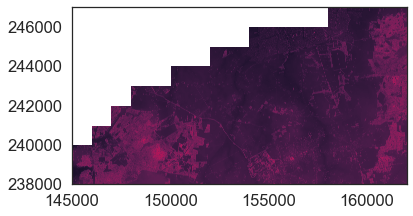

<AxesSubplot:>

In [12]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use geopandas for vector data and rasterio for raster data
import geopandas as gpd
import rasterio as rio
# Plotting extent is used to plot raster & vector data together
from rasterio.plot import show
import numpy as np

import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

#rio.open("/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k01/GeoTIFF/")

DSM1 = ("/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif")
image = rio.open(DSM1)
show(image)

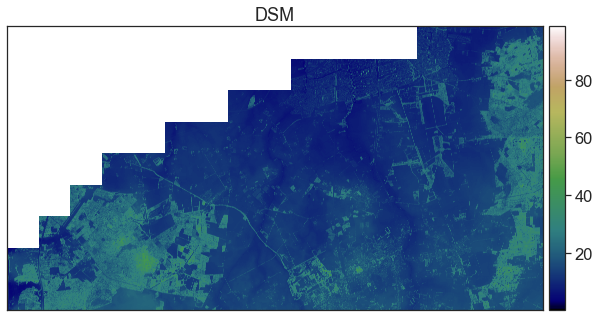

   Id   OpnDatum1   OpnDatum2  \
0   0  2013-02-20        None   
1   0  2013-04-01        None   
2   0  2013-02-20  2013-04-01   

                                            geometry  
0  MULTIPOLYGON Z (((162079.010 238604.770 0.000,...  
1  POLYGON Z ((148803.300 243432.780 0.000, 14882...  
2  MULTIPOLYGON Z (((156554.470 243736.800 0.000,...  


In [12]:

# Open the DEM with Rasterio
with rio.open(dsm, masked=True) as src:
    elevation = src.read(1)
    # Set masked values to np.nan
    elevation[elevation < 0] = np.nan

# Plot the data
ep.plot_bands(
    elevation,
    cmap="gist_earth",
    title="DSM",
    figsize=(10, 6),
)


#plot.dsm(robust=True)
#plt.show()

In [17]:
g = [i for i in shapefile.geometry]

all_coords = []

for b in g[0].boundary:
    coords = np.dstack(b.coords.xy).tolist()
    all_coords.append(*coords)
all_coords

NameError: name 'shapefile' is not defined

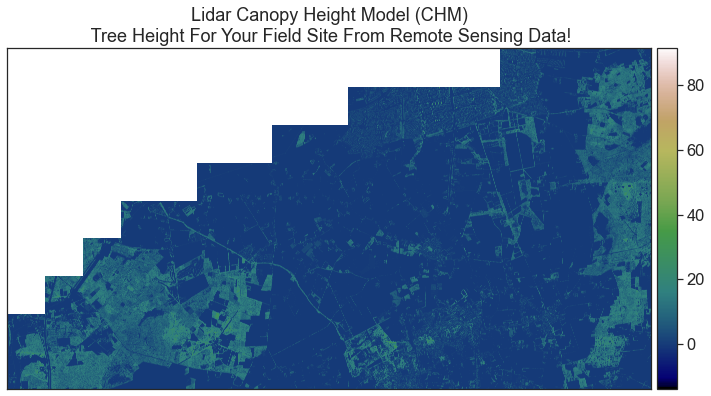

In [15]:
import rioxarray

DSM = rioxarray.open_rasterio("/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif", masked=True)
DTM = rioxarray.open_rasterio("/Users/Jorg/3D_houses_data/DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif", masked=True)
CHM = DSM - DTM

ep.plot_bands(CHM,
              cmap='gist_earth',
              title="(CHM)")
plt.show()


In [19]:
gdallocationinfo -wgs84 /Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif [lat lon]

SyntaxError: invalid decimal literal (3617170323.py, line 1)

In [ ]:

"""
with rioxarray.open_rasterio(CHM, masked=True) as src:
    elevation = src.read(1)
    # Set masked values to np.nan
    elevation[elevation < 0] = np.nan

# Plot the data
ep.plot_bands(
    elevation,
    cmap="gist_earth",
    title="CHM",
    figsize=(10, 6),
)
"""

In [7]:
from osgeo import ogr

#from gdal import ogr
infile = ogr.Open("aWGS84.shp")
layer = infile.GetLayer()

AttributeError: 'NoneType' object has no attribute 'GetLayer'

<AxesSubplot:>

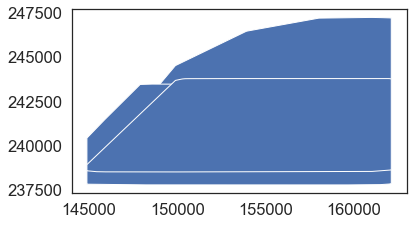

In [58]:
shapefile = gpd.read_file(r"/Users/Jorg/3D_houses_data/DHMVIIDTMRAS1m_k01/DHMVII_vdc_k01/DHMVII_vdc_k01.shp")
shapefile.dtypes
x = shapefile['geometry'].convex_hull
x.plot()

In [5]:
from osgeo import gdal

ds = gdal.Open(ras_file)
gt = ds.GetGeoTransform()
proj = ds.GetProjection()
n_bands = ds.RasterCount
xsize = ds.RasterXSize
ysize = ds.RasterYSize
ds = None

ERROR 4: D:/Temp/input_raster.tif: No such file or directory


AttributeError: 'NoneType' object has no attribute 'GetGeoTransform'

In [2]:
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt

sf = shp.Reader("/Users/Jorg/3D_houses_data/DHMVIIDTMRAS1m_k01/DHMVII_vdc_k01/DHMVII_vdc_k01.shp")

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

NameError: name 'shp' is not defined

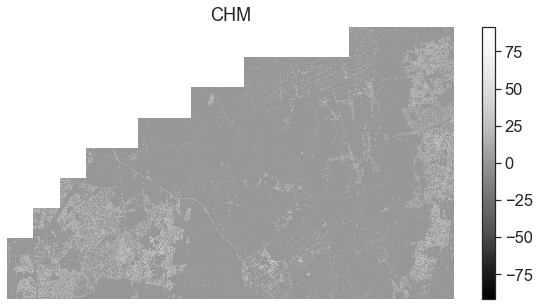

In [14]:
# Plot the data and notice that the scale bar looks better
# No data values are now masked
f, ax = plt.subplots(figsize=(10, 5))
CHM.plot(cmap="Greys_r",
                 ax=ax)
ax.set_title("CHM")
ax.set_axis_off()
plt.show()


In [21]:
import osgeo.gdal
dataset = osgeo.gdal.Open("/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif")
gt = dataset.GetGeoTransform()
gt

(145000.0, 1.0, 0.0, 247000.0, 0.0, -1.0)